# Loading Image

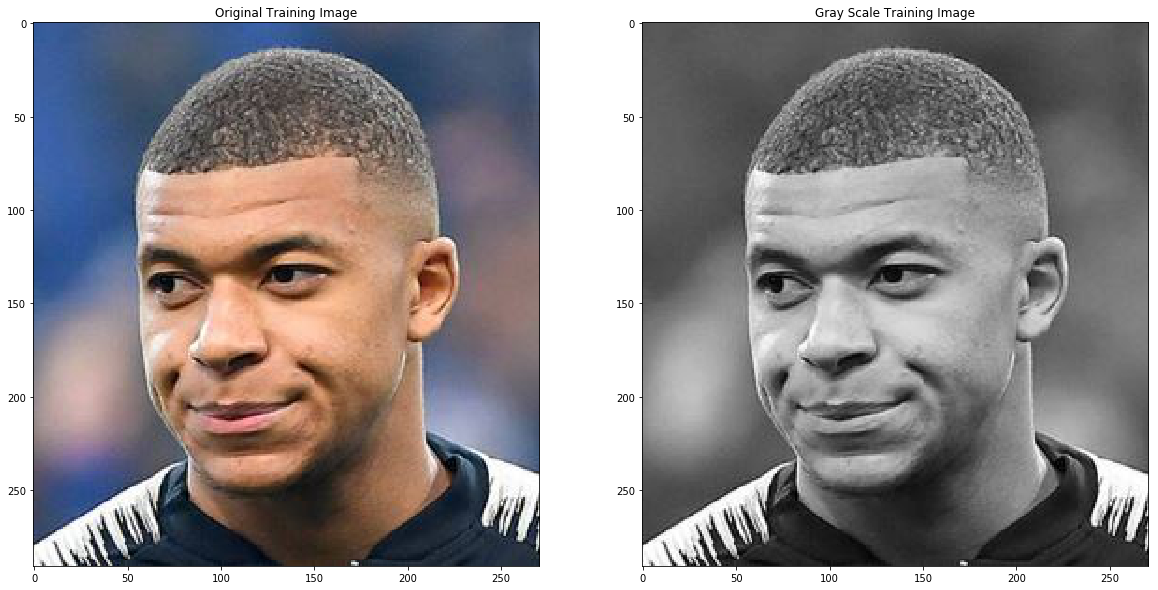

In [45]:
%matplotlib inline

import cv2
import matplotlib.pyplot as plt

# Figure size
plt.rcParams['figure.figsize'] = [20,10]

# Load the image
image = cv2.imread('C:/Users/jeanjules.bigeard/OneDrive - Neato Robotics/Documents/mbappe.jpg')

# Convert the training image to RGB
training_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the training image to gray 
training_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Plot the images
plt.subplot(121)
plt.title('Original Training Image')
plt.imshow(training_image)
plt.subplot(122)
plt.title('Gray Scale Training Image')
plt.imshow(training_gray, cmap = 'gray')
plt.show()

# Creating the keypoints with ORB

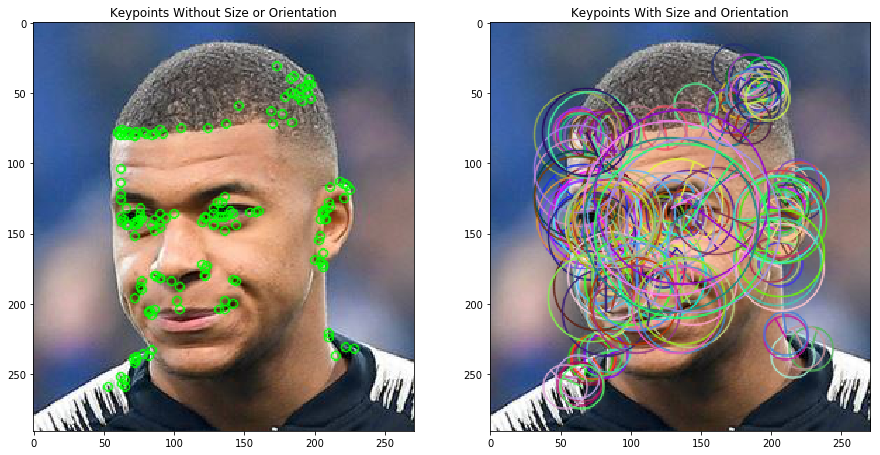

Number of keypoints Detected:  155


In [52]:
import copy

# Set figure size
plt.rcParams['figure.figsize'] = [15, 10]

# Set the parameters of the ORB 
orb = cv2.ORB_create(200, 2.0)

# Find the keypoints in the gray scale 
keypoints, descriptor = orb.detectAndCompute(training_gray, None)

# Create copies to draw our keypoints 
keyp_without_size = copy.copy(training_image)
keyp_with_size = copy.copy(training_image)

# Draw the keypoints without size or orientation 
cv2.drawKeypoints(training_image, keypoints, keyp_without_size, color = (0, 255, 0))

# Draw the keypoints with size and orientation 
cv2.drawKeypoints(training_image, keypoints, keyp_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Plot the images 
plt.subplot(121)
plt.title('Keypoints Without Size or Orientation')
plt.imshow(keyp_without_size)

plt.subplot(122)
plt.title('Keypoints With Size and Orientation')
plt.imshow(keyp_with_size)
plt.show()

# Print the number of keypoints detected
print("Number of keypoints Detected: ", len(keypoints))

# Check matching with another image

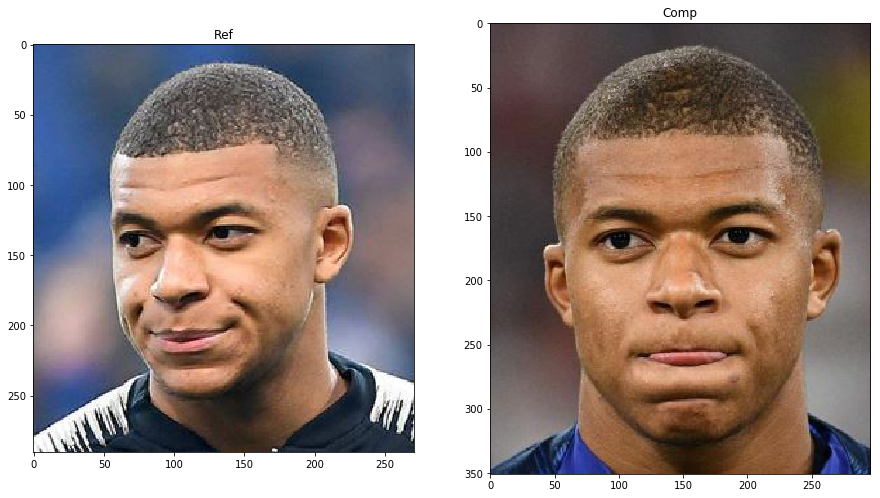

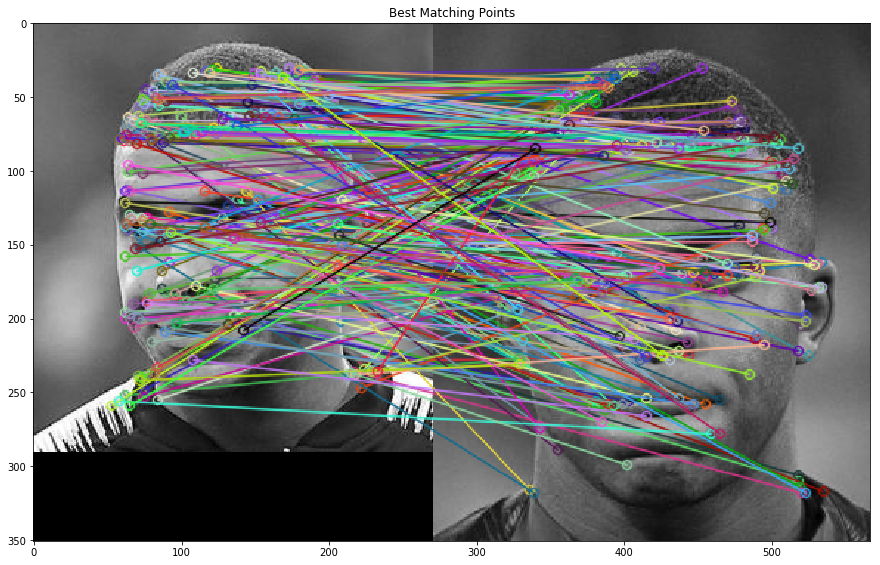

Number of Keypoints Detected In the ref:  681
Number of Keypoints Detected In the comp:  878
Number of Matching Keypoints Between ref and comp:  339


In [58]:
import cv2
import matplotlib.pyplot as plt

# Set figure size
plt.rcParams['figure.figsize'] = [15, 10]

# Load the first image
image1 = cv2.imread('C:/Users/jeanjules.bigeard/OneDrive - Neato Robotics/Documents/mbappe.jpg')

# Load the second image
image2 = cv2.imread('C:/Users/jeanjules.bigeard/OneDrive - Neato Robotics/Documents/mbappebis.jpg')

# Convert images to RGB
image_ref = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image_comp = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# Plot images
plt.subplot(121)
plt.title('Ref')
plt.imshow(image_ref)
plt.subplot(122)
plt.title('Comp')
plt.imshow(image_comp)
plt.show()

# Convert to gray scale
ref_gray = cv2.cvtColor(image_ref, cv2.COLOR_BGR2GRAY)

# Convert to gray scale
comp_gray = cv2.cvtColor(image_comp, cv2.COLOR_BGR2GRAY)

# Set the parameters of the ORB
orb = cv2.ORB_create(1000, 2.0)

# Find the keypoints in the gray 
keypoints_ref, descriptors_ref = orb.detectAndCompute(ref_gray, None)
keypoints_comp, descriptors_comp = orb.detectAndCompute(comp_gray, None)

# Create a Brute Force Matcher object for the matching
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

# Matching between the ORB descriptors of the ref and the comp
matches = bf.match(descriptors_ref, descriptors_comp)

# The matches with shorter distance will be kept
matches = sorted(matches, key = lambda x : x.distance)

# Connect the keypoints in the ref and comp
result = cv2.drawMatches(ref_gray, keypoints_ref, comp_gray, keypoints_comp, matches[:300], comp_gray, flags =2)

# Plot the best matching points
plt.title('Best Matching Points')
plt.imshow(result)
plt.show()

# Print keypoints infos
print("Number of Keypoints Detected In the ref: ", len(keypoints_train))
print("Number of Keypoints Detected In the comp: ", len(keypoints_query))
print("Number of Matching Keypoints Between ref and comp: ", len(matches))

# Testing on the fullsize image with another face

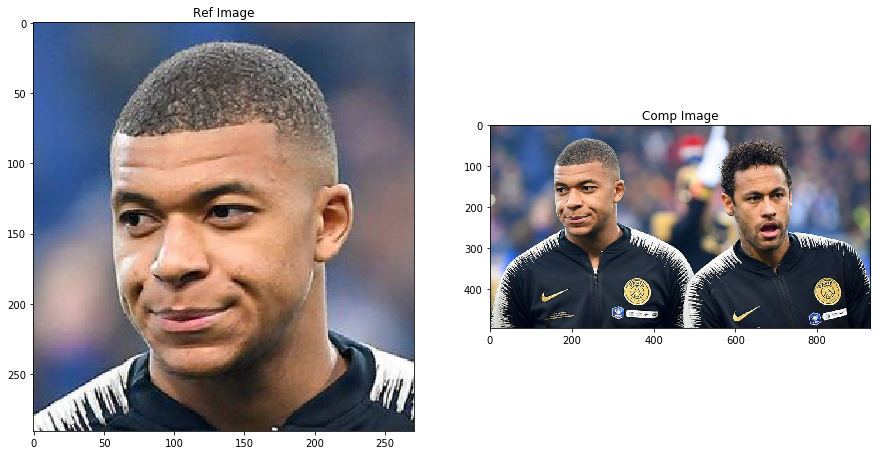

In [60]:
import cv2
import matplotlib.pyplot as plt

# Set figure size
plt.rcParams['figure.figsize'] = [15, 10]

# Load the training image
image1 = cv2.imread('C:/Users/jeanjules.bigeard/OneDrive - Neato Robotics/Documents/mbappe.jpg')

# Load the query image
image2 = cv2.imread('C:/Users/jeanjules.bigeard/OneDrive - Neato Robotics/Documents/team.jpg')

# Convert images to RGB
ref_image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
comp_image = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# Display the images
plt.subplot(121)
plt.imshow(ref_image)
plt.title('Ref Image')
plt.subplot(122)
plt.imshow(comp_image)
plt.title('Comp Image')
plt.show()

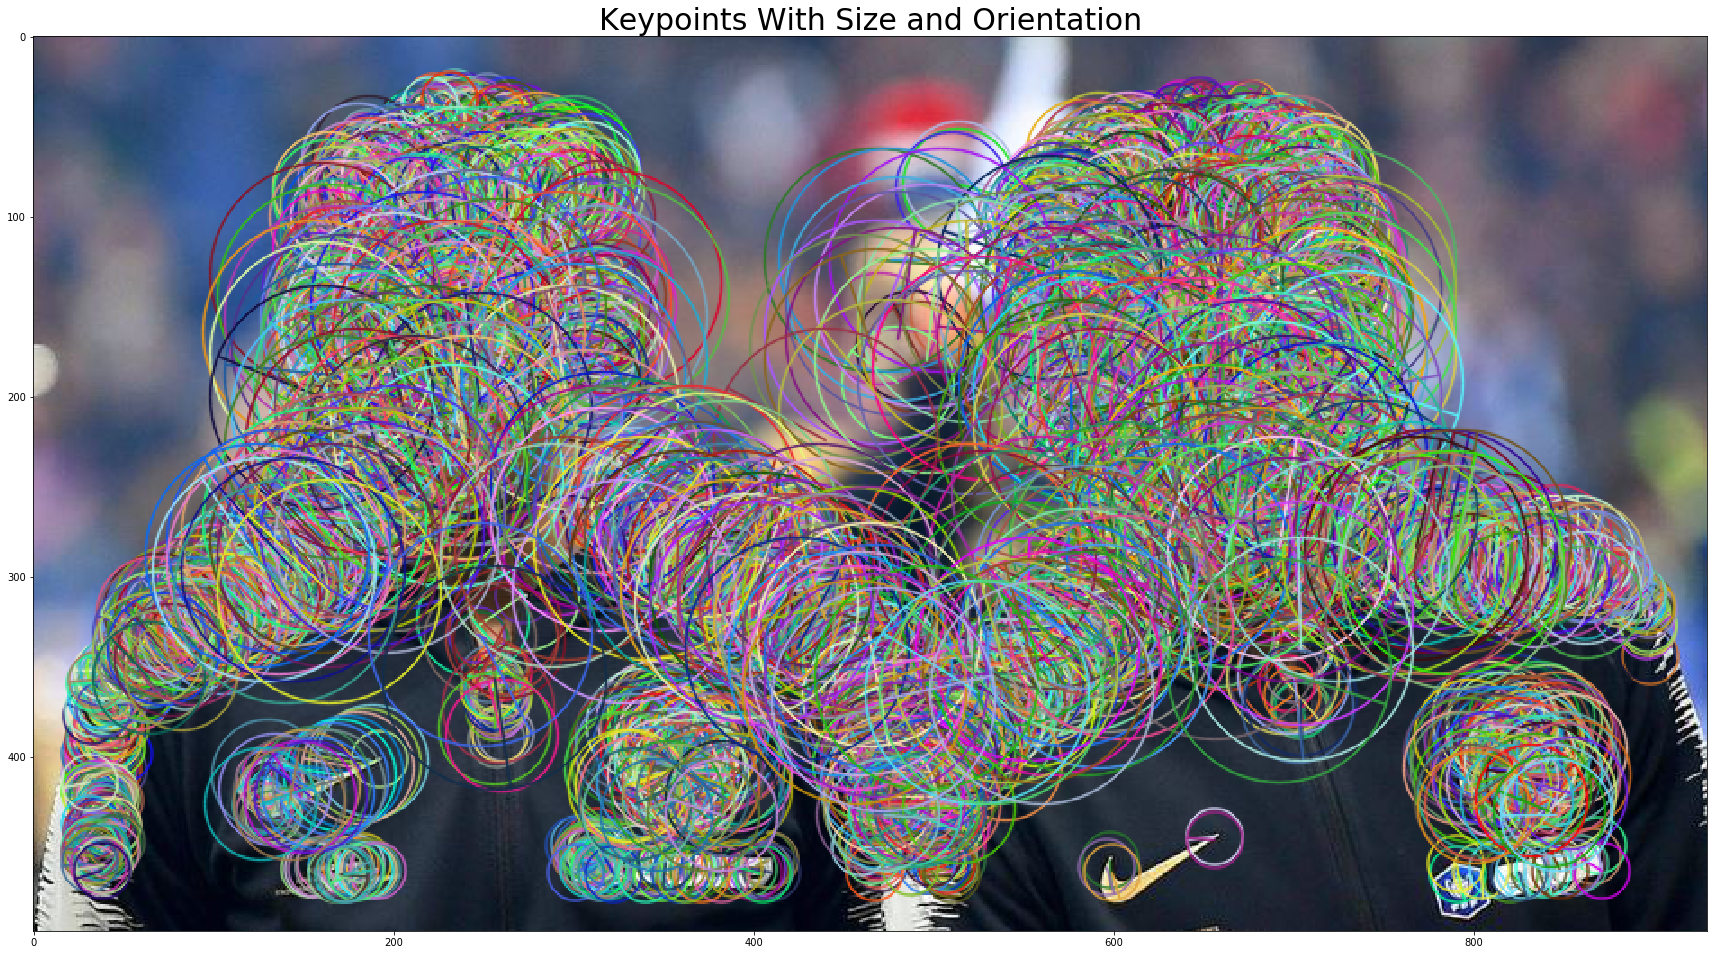

Number of keypoints Detected:  3885


In [62]:
# Set figure size
plt.rcParams['figure.figsize'] = [30,30]

# Convert images to gray scale
ref_gray = cv2.cvtColor(ref_image, cv2.COLOR_BGR2GRAY)
comp_gray = cv2.cvtColor(comp_image, cv2.COLOR_BGR2GRAY)

# Set the parameters of the ORB 
orb = cv2.ORB_create(5000, 2.0)

# Find the keypoints in the gray scales
keypoints_ref, descriptors_ref = orb.detectAndCompute(ref_gray, None)
keypoints_comp, descriptors_comp = orb.detectAndCompute(comp_gray, None)

# Create copies to draw our keypoints on
comp_img_keyp = copy.copy(comp_image)

# Draw the keypoints with size and orientation 
cv2.drawKeypoints(comp_image, keypoints_comp, comp_img_keyp, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Plot the the keypoints with size and orientation
plt.title('Keypoints With Size and Orientation', fontsize = 30)
plt.imshow(comp_img_keyp)
plt.show()

# Print the number of keypoints detected
print("Number of keypoints Detected: ", len(keypoints_comp))

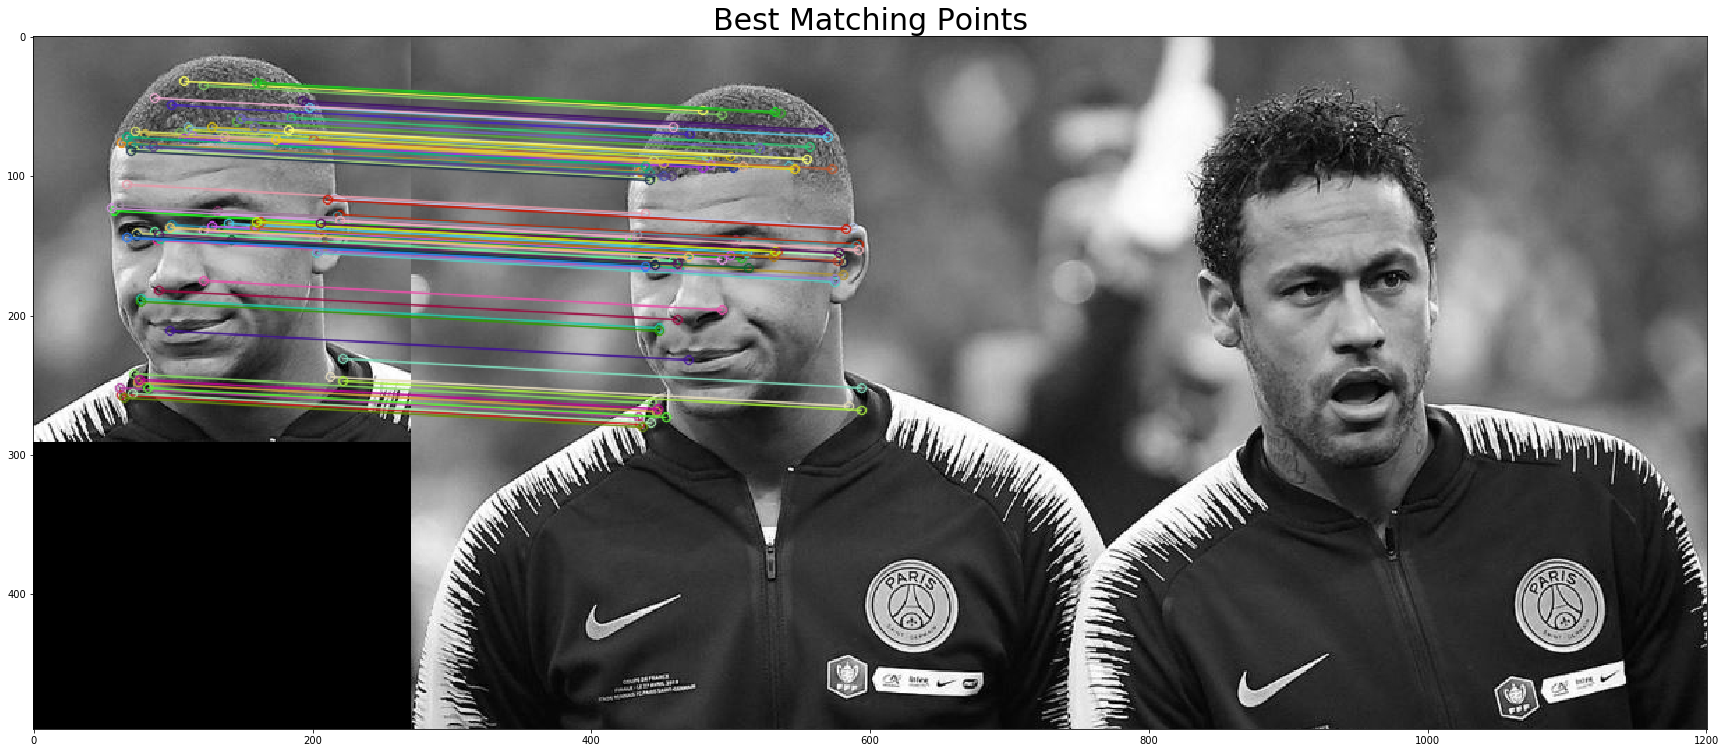

Number of Keypoints Detected In The Training Image:  944
Number of Keypoints Detected In The Query Image:  3885

Number of Matching Keypoints Between The Training and Query Images:  866


In [63]:
# Set figure size
plt.rcParams['figure.figsize'] = [30,30]

# Create a Brute Force Matcher object for the matching
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

# Perform the matching between the ORB descriptors 
matches = bf.match(descriptors_ref, descriptors_comp)

# The matches with shorter distance will be kept
matches = sorted(matches, key = lambda x : x.distance)

# Connect the keypoints in the ref and comp
result = cv2.drawMatches(ref_gray, keypoints_ref, comp_gray, keypoints_comp, matches[:85], comp_gray, flags = 2)

# Plot images
plt.title('Best Matching Points', fontsize = 30)
plt.imshow(result)
plt.show()

# Print the number of keypoints
print("Number of Keypoints Detected In The Training Image: ", len(keypoints_ref))
print("Number of Keypoints Detected In The Query Image: ", len(keypoints_comp))
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))